# Clustering the Countries by using K-means and AgglomerativeClustering


## About Dataset 
Dataset from(https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)
### Clustering the Countries by using Unsupervised Learning for HELP International
#### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

#### About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

#### Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Dataset colmuns description
- **country** : Name of the country
- **child_mort** : Death of children under 5 years of age per 1000 live births
- **exports** : Exports of goods and services per capita. Given as %age of the GDP per capita
- **health** : Total health spending per capita. Given as %age of GDP per capita
- **imports** : Imports of goods and services per capita. Given as %age of the GDP per capita
- **Income** : Net income per person
- **Inflation** : The measurement of the annual growth rate of the Total GDP
- **life_expec** : The average number of years a new born child would live if the current mortality patterns are to remain the - same
- **total_fer** : The number of children that would be born to each woman if the current age-fertility rates remain the same.
- **gdpp** : The GDP per capita. Calculated as the Total GDP divided by the total population.


## 0. Import necessary libraries
In this project, I will classify this dataset by using two models `K-means Clustering` and `Hierarchical Clustering(AgglomerativeClustering)`


In [151]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

## 1. EDA 

In [3]:
# read data 
path = "./data/Country-data.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# detect null in dartaframe
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### 1.1 Drop unnecessary columns
Country name is not an appropriate feature for classification, so I will drop it.

In [7]:
country_name = df['country']
df.drop(['country'], axis=1, inplace=True)

In [8]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [9]:
country_name

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [10]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### 1.2 Show data in plot

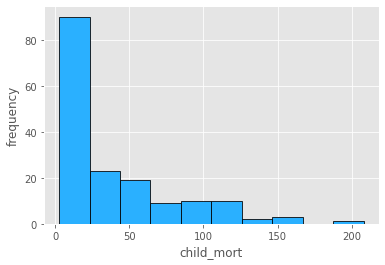

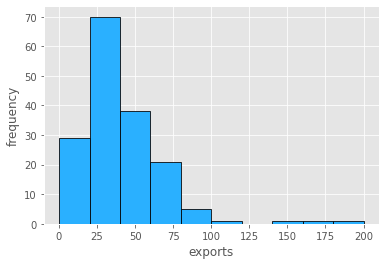

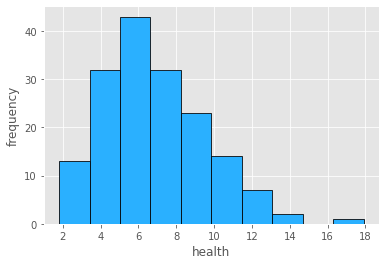

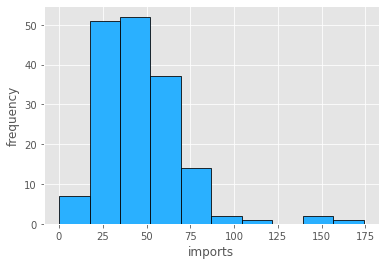

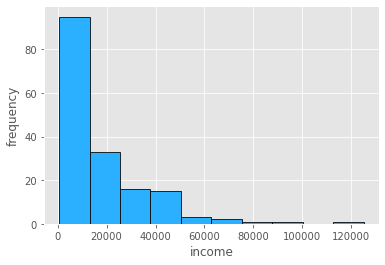

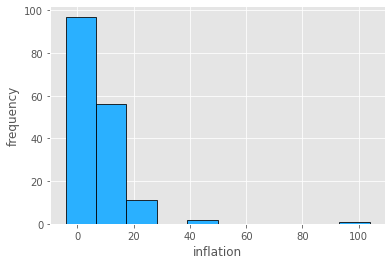

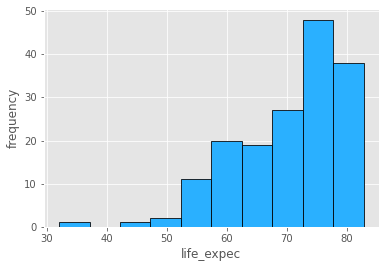

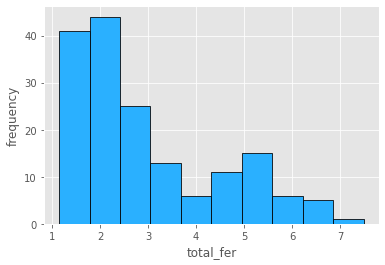

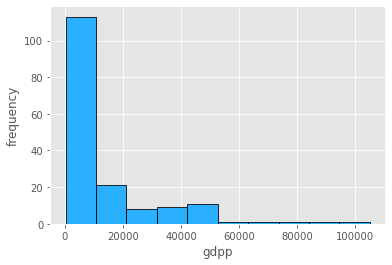

In [18]:
## draw the hist for each feature

for f in df.columns:
    x = df[f]
    plt.xlabel(f)    
    plt.ylabel("frequency")
    plt.style.use('ggplot')
    plt.hist(x, facecolor = '#2ab0ff', edgecolor='#000000', linewidth=0.8)
    plt.show()

In [19]:
## draw the box plot for each feature

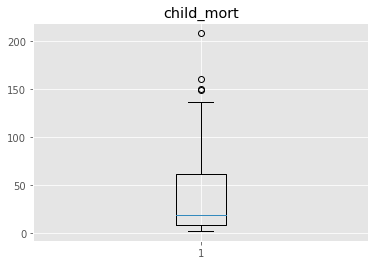

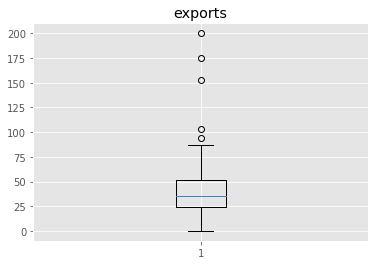

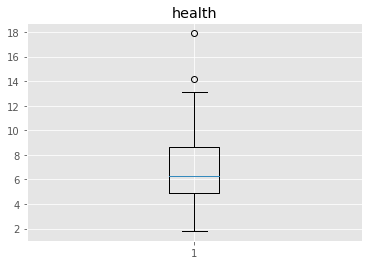

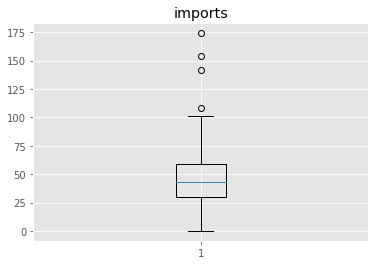

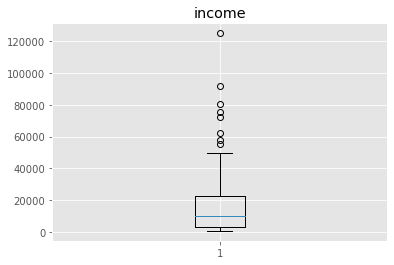

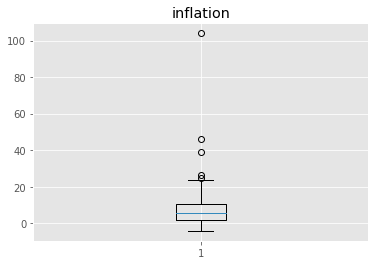

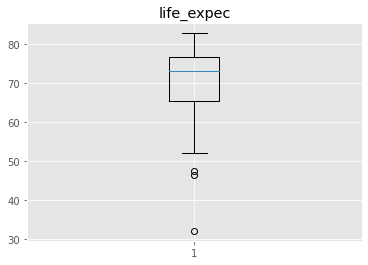

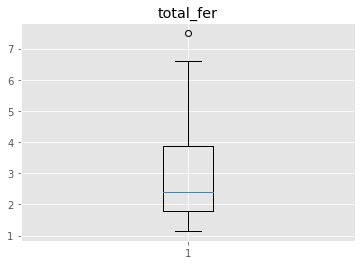

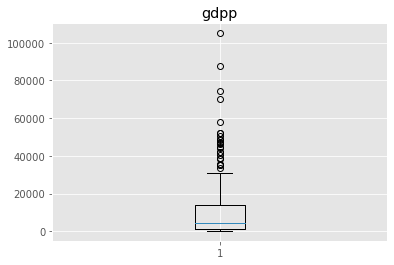

In [21]:
for f in df.columns:
    x = df[f]
    plt.title(f)
    plt.style.use('ggplot')
    plt.boxplot(x)
    plt.show()

In [22]:
## let's see heatmap and pairplot

<AxesSubplot:>

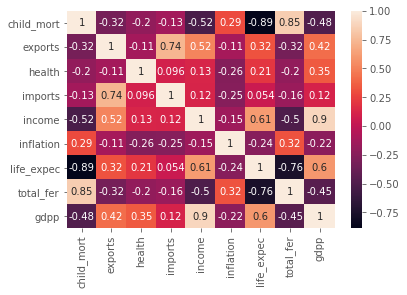

In [23]:
corr=df.corr()
sns.heatmap(corr,annot=True)

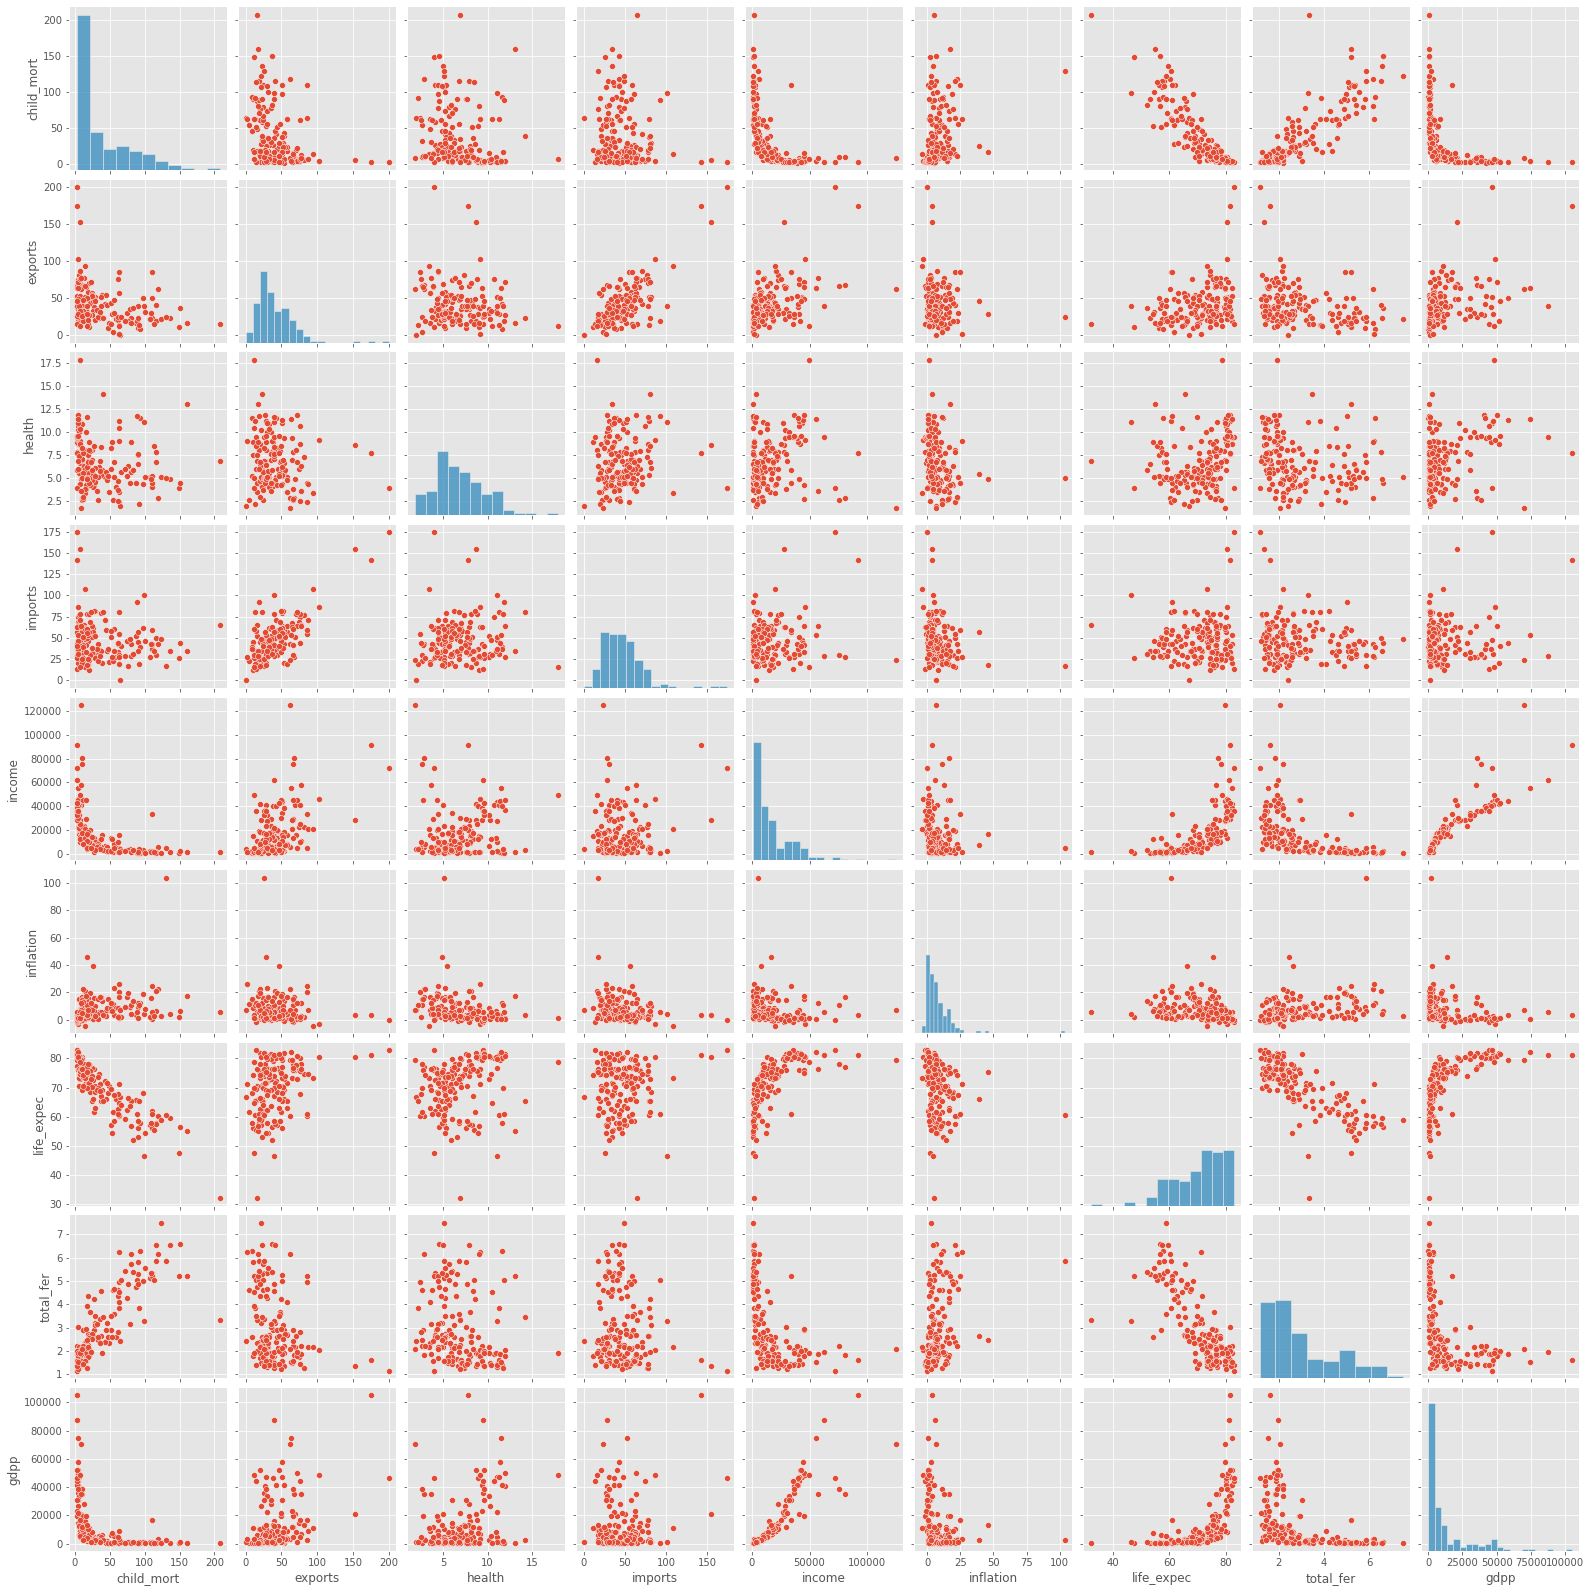

In [24]:
sns.pairplot(df)

From hists and boxplots we knows lots of data have outliers especially gdpp, and let's see how cluster going

## 2. Build Model
In this stage, I will build 2 models (K-Means and AgglomerativeClustering), and choose the best parameters then compare two models.

### 2.1 K-means


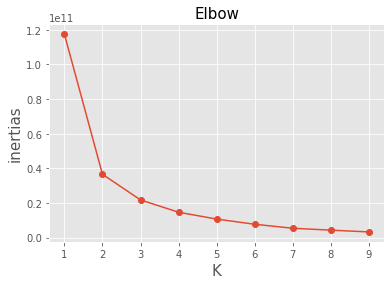

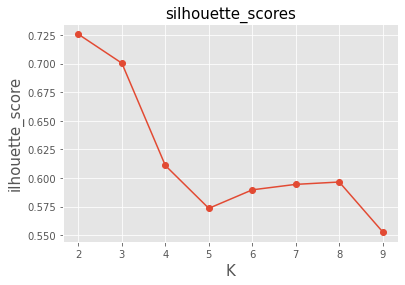

In [38]:
## first, find the K


kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(df) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]
silhouette_scores = [silhouette_score(df, model.labels_) for model in kmeans_list[1:]]


plt.title('Elbow',fontsize=15)
plt.xlabel('K',fontsize=15)
plt.ylabel('inertias',fontsize=15)
plt.plot(range(1,10),inertias,marker='o')
plt.show()

plt.title('silhouette_scores',fontsize=15)
plt.xlabel('K',fontsize=15)
plt.ylabel('ilhouette_score',fontsize=15)
plt.plot(range(2,10),silhouette_scores,marker='o')
plt.show()


According to Elbow method and silhouette_scores, we will choose `K = 3` for `n_clusters` parameter

In [40]:
## build model
kmeans_model = KMeans(n_clusters = 3).fit(df)

1    128
2     32
0      7
dtype: int64

In [41]:
kmeans_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1])

In [57]:
unique, counts = np.unique(kmeans_model.labels_, return_counts=True)
print(dict(zip(unique, counts)))
score = silhouette_score(df, kmeans_model.labels_)
print(score)

{0: 36, 1: 84, 2: 47}
0.22595133318635627


The result isn't balanced, so I am trying to fix that.


In [50]:
## rescale the data
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
print(type(scaled))
scaled_df = pd.DataFrame(scaled ,columns=df.columns)
print(scaled_df.head())

<class 'numpy.ndarray'>
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817  


In [52]:
## rebuild the K-means model by scaled dataframe

In [58]:
kmeans_model = KMeans(n_clusters = 3).fit(scaled_df)
unique, counts = np.unique(kmeans_model.labels_, return_counts=True)
print(dict(zip(unique, counts)))
score = silhouette_score(scaled_df, kmeans_model.labels_)
print(score)

{0: 84, 1: 36, 2: 47}
0.28329575683463126


It looks better, so we can see what this result means.


In [64]:
kmeans_model.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [65]:
# append labels to dataframe

In [67]:
df["K-Means"] = kmeans_model.labels_

In [68]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


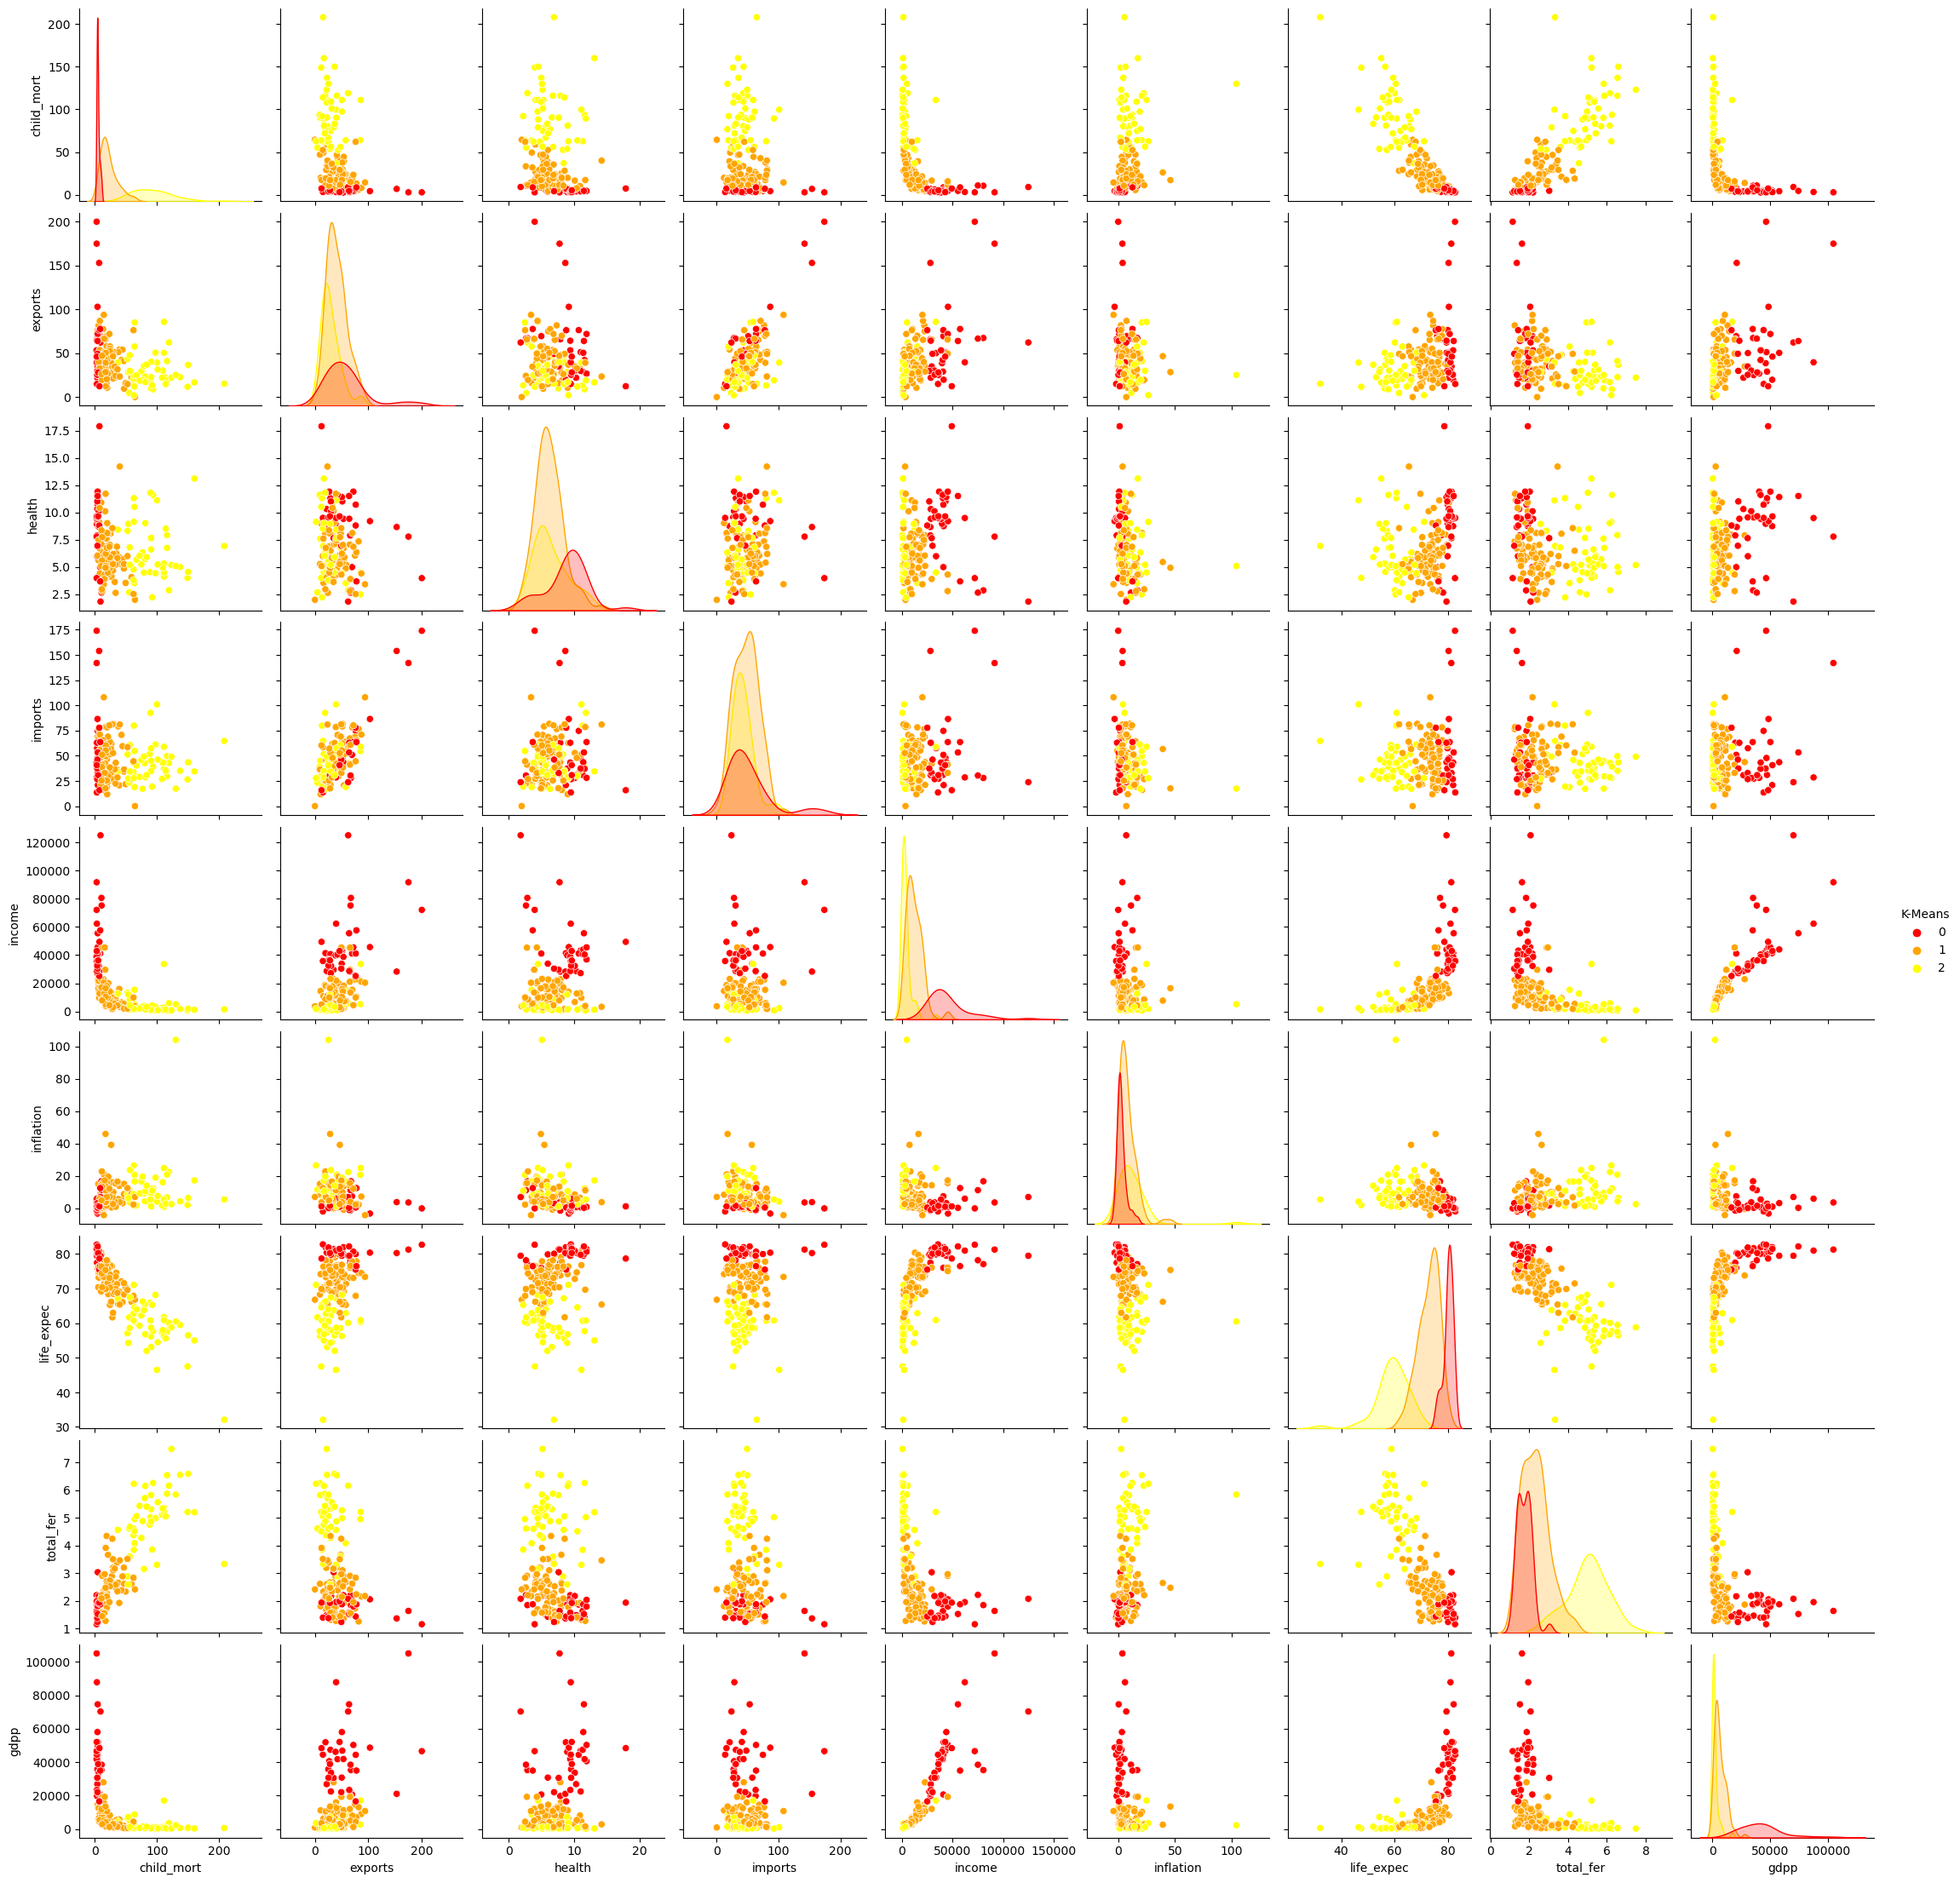

In [94]:

plt.style.use('default')
sns.pairplot(df,hue="K-Means",palette=['red','orange','yellow'])

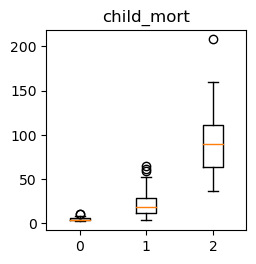

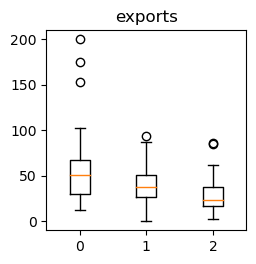

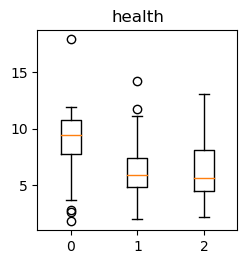

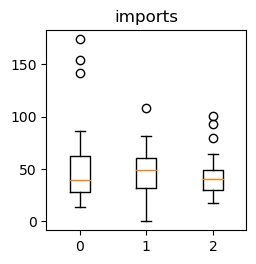

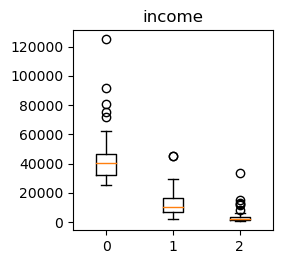

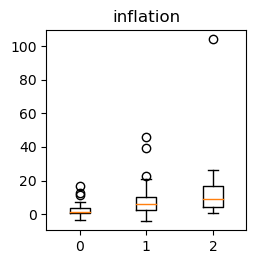

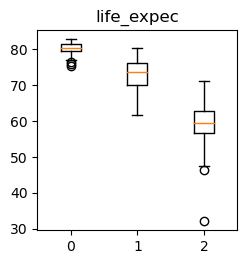

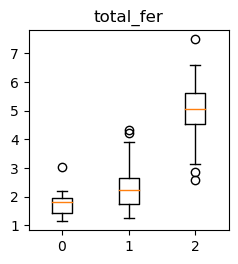

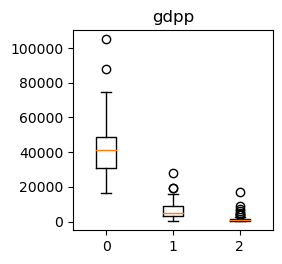

In [109]:
for f in df.columns:
    if f != "K-Means":
        data_0 = df[df["K-Means"]==0][f]
        data_1 = df[df["K-Means"]==1][f]
        data_2 = df[df["K-Means"]==2][f]
        data = [data_0, data_1, data_2]
        fig = plt.figure(figsize =(2, 2))
        ax = fig.add_axes([0, 0, 1, 1])
        ax.set_xticklabels([0,1,2])
        ax.set_title(f)
        bp = ax.boxplot(data)

        # show plot
        plt.show()

### 2.2 K-means Result

After clustering, we have 3 different cluster for our data. According to the pair plots and box plots we can induction some conclusion.
In `cluster 0`, it has highest `gdpp`, `income`, `life_expec`, and lowest `child_mort`, `total_fer`. 
It means these country in `cluster 0` has highest income, and their people pay a higher ratio to health, so the number of years a new born child would live is highest, that is to say, children have higher live ratio.

In `cluster 2`, it has lowest `gdpp`, `income`, `life_expec`,  `health`, and highest `child_mort`, `total_fer`. 
It means these country in `cluster 2` has lowest income, and their birth rate is highest, but we can see the health cost of gdpp is lowest, so insufficient medical resources cause `life_expec` lower and `child_mort` higher.

and `cluster 1` is countries between `cluster 0` and `cluster 2`.


As the result, we can labeled these cluster to `Developed countries` `Developing countries` `Least developed countries`

In [111]:
result_df = df.copy()
result_df['country'] = country_name
Developed_countries = result_df[result_df['K-Means'] == 0]['country']
Developing_countries = result_df[result_df['K-Means'] == 1]['country']
Least_developed_countries = result_df[result_df['K-Means'] == 2]['country']

In [146]:
r_d = pd.DataFrame()

ded = Developed_countries.reset_index()['country']
ding = Developing_countries.reset_index()['country']
lded = Least_developed_countries.reset_index()['country']
r_d = pd.concat([ded,ding,lded], axis=1) 

re_d = r_d.set_axis(['Developed_countries', 'Developing_countries', 'Least_developed_countries'], axis=1, inplace=False)

In [150]:
re_d.head(10)

,Developed_countries,Developing_countries,Least_developed_countries
0,Australia,Albania,Afghanistan
1,Austria,Algeria,Angola
2,Bahrain,Antigua and Barbuda,Benin
3,Belgium,Argentina,Botswana
4,Brunei,Armenia,Burkina Faso
5,Canada,Azerbaijan,Burundi
6,Cyprus,Bahamas,Cameroon
7,Czech Republic,Bangladesh,Central African Republic
8,Denmark,Barbados,Chad
9,Finland,Belarus,Comoros


### 2.3 AgglomerativeClustering

In [153]:
A_model = AgglomerativeClustering(n_clusters = 3)
A_model.fit_predict(scaled_df)
A_label = A_model.labels_

In [154]:
A_label

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [196]:
unique, counts = np.unique(A_label, return_counts=True)
print(dict(zip(unique, counts)))
score = silhouette_score(df, A_label)
print(score)

{0: 34, 1: 106, 2: 27}
0.17256557064358438


Score is not close to k-means, so let's do some work on parameters


In [189]:
linkages = ['complete', 'average', 'single']
affinitys = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

A_model = AgglomerativeClustering(n_clusters = 3, linkage = "ward", affinity = 'euclidean')
A_model.fit_predict(scaled_df)
A_label = A_model.labels_
score = silhouette_score(df, A_label)
best_linkage = "ward"
best_metric = 'euclidean'
best_score = score

for l in linkages:
    for a in affinitys:
        #print(l,a)
        A_model = AgglomerativeClustering(n_clusters = 3, linkage = l, affinity = a)
        A_model.fit_predict(scaled_df)
        A_label = A_model.labels_
        score = silhouette_score(df, A_label)
        if score > best_score:
            best_score = score
            best_linkage = l
            best_metric = a
print(best_score, best_linkage, best_metric)
# rebuild best model
A_model = AgglomerativeClustering(n_clusters = 3, linkage = best_linkage, affinity = best_metric)
A_model.fit_predict(scaled_df)
A_label = A_model.labels_
df["Agglomerative"] = A_label
result_df["Agglomerative"] = A_label

0.17256557064358438 ward euclidean


From the test, ward euclidean is the best pair of parameters for `AgglomerativeClustering` in this dataset

In [169]:
## plot 

In [180]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means,Agglomerative
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1
...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,1
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,1


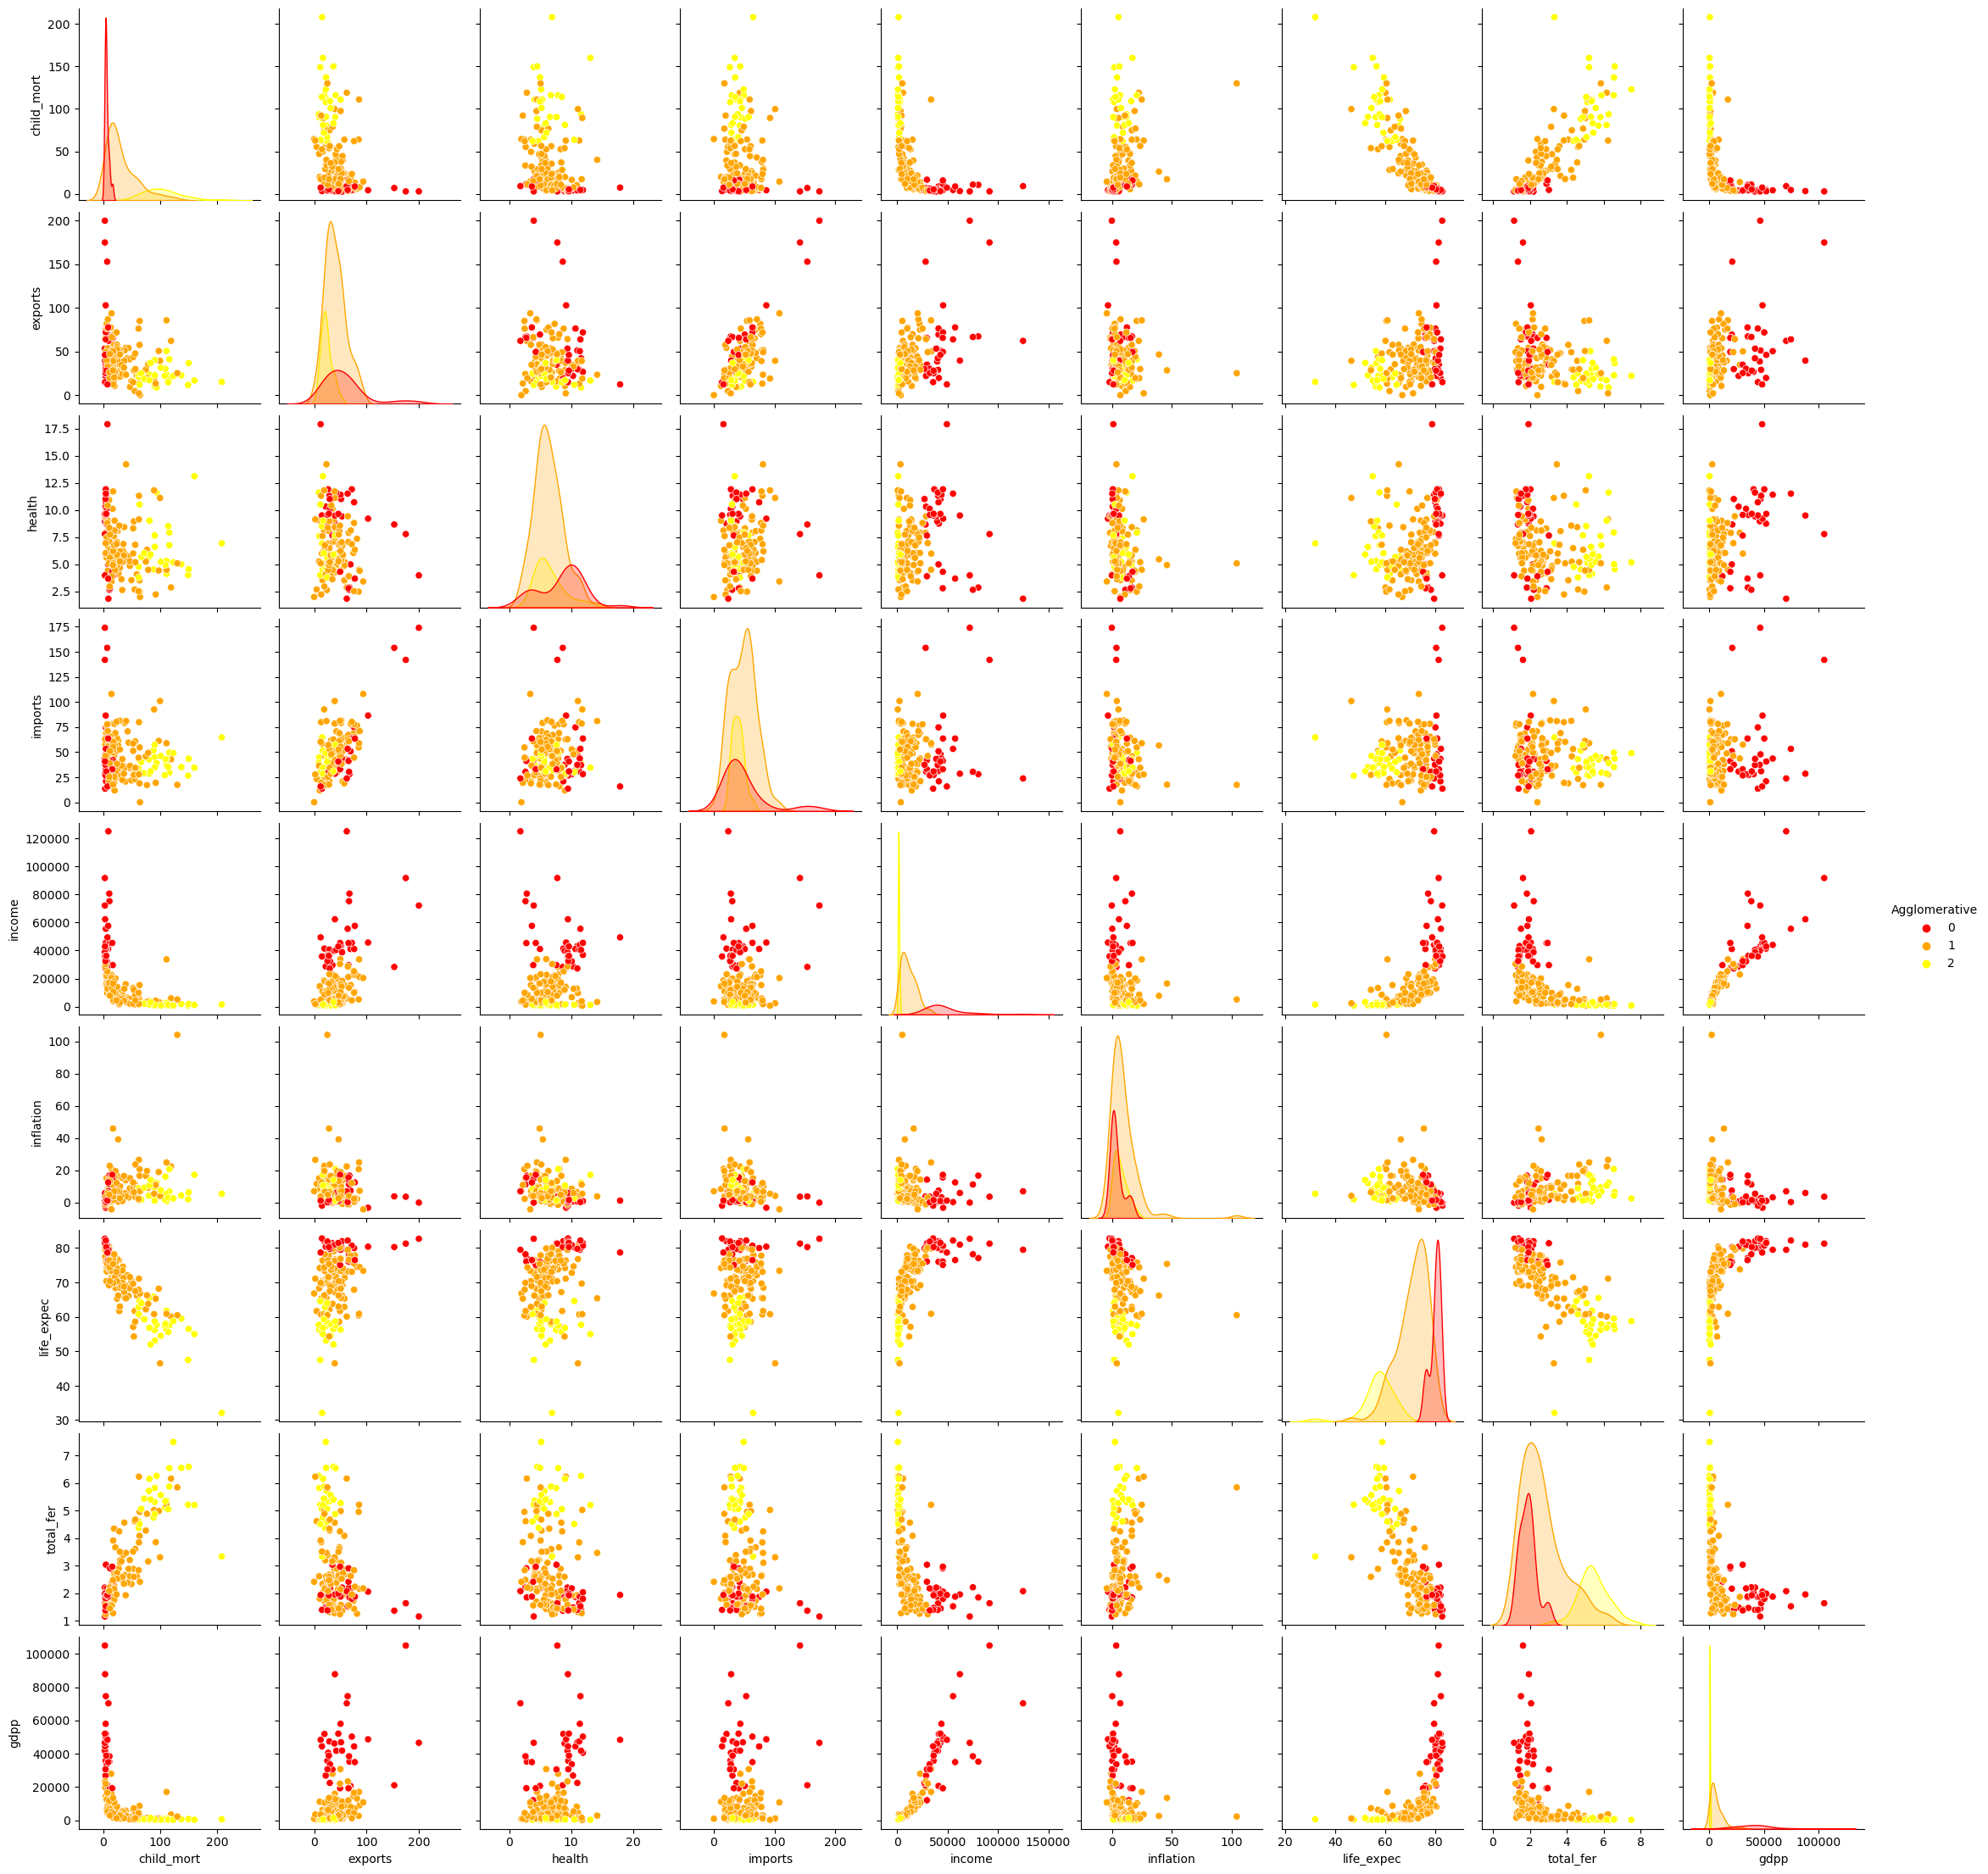

In [186]:

plt.style.use('default')
df_nokmeans = df.copy()
df_nokmeans.drop(["K-Means"], axis=1, inplace=True)
sns.pairplot(data = df_nokmeans,hue="Agglomerative",palette=['red','orange','yellow'])

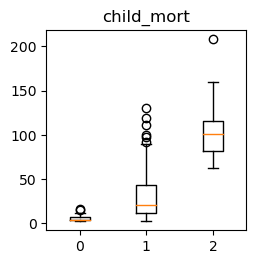

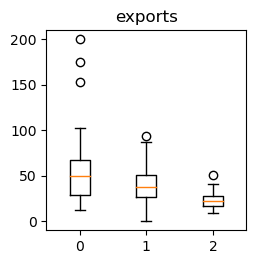

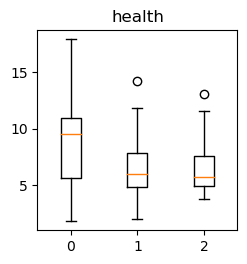

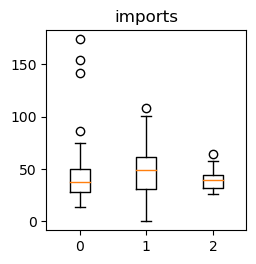

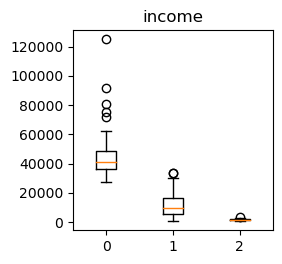

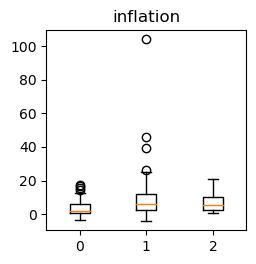

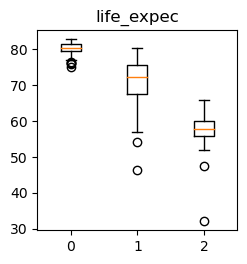

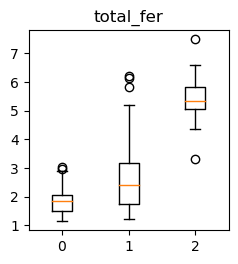

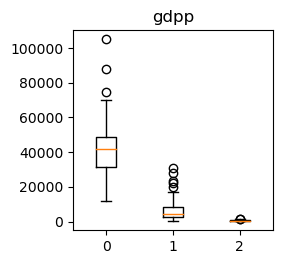

In [182]:
for f in df.columns:
    if f != "Agglomerative" and f != "K-Means":
        data_0 = df[df["Agglomerative"]==0][f]
        data_1 = df[df["Agglomerative"]==1][f]
        data_2 = df[df["Agglomerative"]==2][f]
        data = [data_0, data_1, data_2]
        fig = plt.figure(figsize =(2, 2))
        ax = fig.add_axes([0, 0, 1, 1])
        ax.set_xticklabels([0,1,2])
        ax.set_title(f)
        bp = ax.boxplot(data)

        # show plot
        plt.show()

### 2.4 AgglomerativeClustering result
We can see the result is similar to the `K-means` result, so I will compare the difference between them.

In [194]:

result_df = result_df.reindex(columns=["country", "child_mort", "exports", "health", "imports", "income",
                                       "inflation", "life_expec", "total_fer", "gdpp", "K-Means",  "Agglomerative"])
diff = result_df[result_df["Agglomerative"] != result_df["K-Means"]]


In [195]:
diff

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means,Agglomerative
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,2,1
38,"Congo, Rep.",63.9,85.10,2.46,54.7,5190,20.700,60.4,4.95,2740,2,1
42,Cyprus,3.6,50.20,5.97,57.5,33900,2.010,79.9,1.42,30800,0,1
43,Czech Republic,3.4,66.00,7.88,62.9,28300,-1.430,77.5,1.51,19800,0,1
49,Equatorial Guinea,111.0,85.80,4.48,58.9,33700,24.900,60.9,5.21,17100,2,1
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,2,1
55,Gabon,63.7,57.70,3.50,18.9,15400,16.600,62.9,4.08,8750,2,1
59,Ghana,74.7,29.50,5.22,45.9,3060,16.600,62.2,4.27,1310,2,1
72,Iraq,36.9,39.40,8.41,34.1,12700,16.600,67.2,4.56,4500,2,1


## 3. Conclusion

In this project, I used `K-means` and `Agglomerative Clustering` to classify country data,I found the data about country's per capita **income** **GDP**, **fertility** and **neonatal deaths** in EDA, as a feature. Through the Elbow method, `n_clusters = 3` is determined. The data is divided into three groups. The clustered data of the optimized `K-means` and `AgglomerativeClustering` models show that the three clusters represent **Developed countries**, **Developing countries**, and **Least developed countries**.
By classifying countries through the model, We can find the countries where need assistance, and if the model can be trained with a larger amount of data, the accuracy of the classification will be better.